# Assignment 2
## DATA VISUALIZATION

#### Prasanna R.                                                                                                                       
#### TLS21A345

#### Objective:
#### Cryptocurrency price data analysis.

# Introduction

What does a virtual coin that people like or hate, an excentric person that wants to get old on Mars and the suite of software libraries on GPUs all have in common?

Well, you know what they say ... if you want, you can find a correlation anywhere you look ... if you're really, deeply paying attention.

Originally formed as a joke,Dogecoin was created by IBM software engineer Billy Markus and Adobe software engineer Jackson Palmer. They wanted to create a peer-to-peer digital currency that could reach a broader demographic than Bitcoin. In addition, they wanted to distance it from the controversial history of other coins. Dogecoin was officially launched on December 6, 2013, and within the first 30 days, there were over a million visitors to Dogecoin.com.

Dogecoin is very interesting,it's recent headlines and growing popularity among young investors this may be a reality even though in terms of technology it is essentially a bitcoin clone

The Ultimate goal of this analysis was to analyze and make observations on the prices of these cryptocurrencies and determine it's value as an investment. The data tells us that cryptocurrency as a whole is incredible volatile and largely unpredictable at the current time, that being said we do also have consistant rising trend lines over their short lives. So as with any investment this is all about the individual risk:reward, how much risk you can take on to justify the potential massive returns crypto much like it has given in the past? That question is only answered by the individual investor and/or financial advisor(which I am not).


This data set is also quite good, after reading this analysis is when I wanted to swap to seaborn but I feared it was too late but I figured it's always an improvement I can make on my own time.
I found this well put together dataset on kaggle that gives us the historical data for our cryptocurrencies plus many extras that we will not be using today.

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory



In [28]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline

#  Defining all of our dataframes and creating a list

In [26]:
btc = pd.read_csv('Bitcoin.csv')
doge = pd.read_csv('Dogecoin.csv')
eth = pd.read_csv('Ethereum.csv')
xrp = pd.read_csv('XRP.csv')
crypto = [btc, doge, eth, xrp]



# Formatting the data


In [4]:
#Changing 'Date' to the datetime 
for i in crypto:
    i['Date'] = pd.to_datetime(i['Date'])

# Changing the numerical index for our date time
for i in crypto:
    i.set_index('Date', drop=True, inplace=True)
    i.sort_index(inplace=True)

# Get's rid of all the commas in each dataframe
for i in crypto:
    i.replace(',', '', regex=True, inplace=True)

# Converts all of the values in the Price, Open, High, and Low columns
for i in crypto:
    i['High'] = i['High'].astype(float)
    i['Low'] = i['Low'].astype(float)
    i['Open'] = i['Open'].astype(float)
    i['Close'] = i['Close'].astype(float)

#Dropping unnecessary columns
btc.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
doge.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
eth.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
xrp.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)

#To check for any null values in the datasets
def nullcheck(x):
    x['High'].isnull().sum()
    x['Low'].isnull().sum()
    x['Open'].isnull().sum()
    x['Close'].isnull().sum()

print(nullcheck(btc))
print(nullcheck(doge))
print(nullcheck(eth))
print(nullcheck(xrp))

None
None
None
None


# We'll use Bitcoin as an example. Data is structured in the exact same way, so  the actual values will be the same through all four dataframes

In [5]:
print(btc.describe())
print(btc.head(5))
print(btc.tail(5))

               High           Low          Open         Close        Volume
count   2991.000000   2991.000000   2991.000000   2991.000000  2.991000e+03
mean    6893.326038   6486.009539   6700.146240   6711.290443  1.090633e+10
std    11642.832456  10869.032130  11288.043736  11298.141921  1.888895e+10
min       74.561096     65.526001     68.504997     68.431000  0.000000e+00
25%      436.179001    422.879486    430.445496    430.569489  3.036725e+07
50%     2387.610107   2178.500000   2269.889893   2286.409912  9.460360e+08
75%     8733.926948   8289.800459   8569.656494   8576.238715  1.592015e+10
max    64863.098908  62208.964366  63523.754869  63503.457930  3.509679e+11
                           High         Low        Open       Close  Volume
Date                                                                       
2013-04-29 23:59:59  147.488007  134.000000  134.444000  144.539993     0.0
2013-04-30 23:59:59  146.929993  134.050003  144.000000  139.000000     0.0
2013-05-01 2

### Date :   Date of observation

### Open :  Opening price on the given day

### High :   Highest price on the given day

### Low :    Lowest price on the given day

### Close : Closing price on the given day

### Volume : Volume of transactions on the given day

### Let's take a peak at each one of our cryptos, We'll show some basic data as well as the first and last day of our dataframe to get an idea of our timeframe, price change and standard deviation.


In [6]:
def infofinder(data, title):
    print(title)
    print(data.describe())
    print(data.head(1))
    print(data.tail(1))
    print('='*85 + '\n' + '='*85)

infofinder(btc, '=Bitcoin=')
infofinder(doge, '=Dogecoin=')
infofinder(eth, '=Ethereum=')
infofinder(xrp, '=XRP=')

=Bitcoin=
               High           Low          Open         Close        Volume
count   2991.000000   2991.000000   2991.000000   2991.000000  2.991000e+03
mean    6893.326038   6486.009539   6700.146240   6711.290443  1.090633e+10
std    11642.832456  10869.032130  11288.043736  11298.141921  1.888895e+10
min       74.561096     65.526001     68.504997     68.431000  0.000000e+00
25%      436.179001    422.879486    430.445496    430.569489  3.036725e+07
50%     2387.610107   2178.500000   2269.889893   2286.409912  9.460360e+08
75%     8733.926948   8289.800459   8569.656494   8576.238715  1.592015e+10
max    64863.098908  62208.964366  63523.754869  63503.457930  3.509679e+11
                           High    Low     Open       Close  Volume
Date                                                               
2013-04-29 23:59:59  147.488007  134.0  134.444  144.539993     0.0
                             High           Low          Open         Close  \
Date                   

##  We have a basic idea of the numbers we're working with, and we can clearly see crypto growth has been incredibly rapid and volatile with massive price differences in the first and last day of our data set which goes back about eight years.

## Let's start visualizing our data, we'll compare all four cryptos life time price change


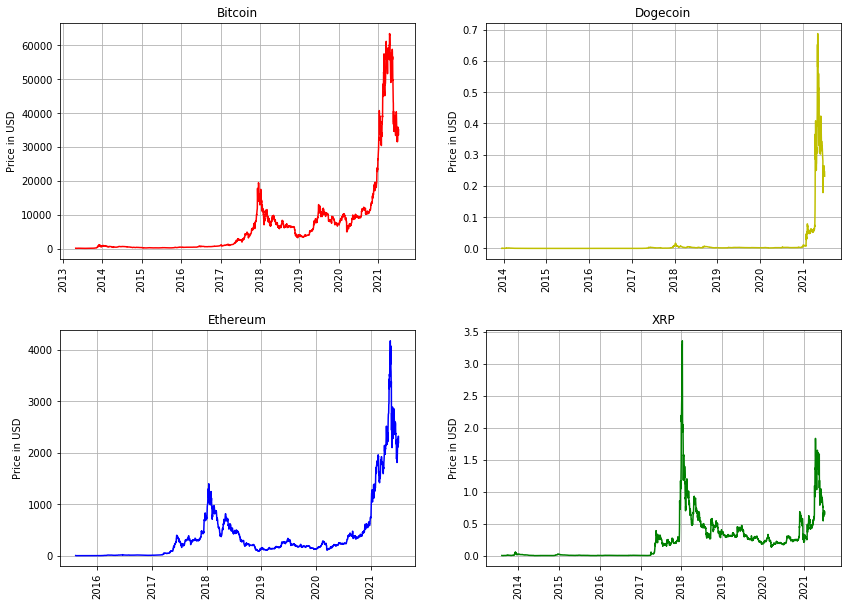

In [8]:
fig, ax = plt.subplots(2,2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

btcpos = 0,0
dogepos = 0,1
ethpos = 1,0
xrppos = 1,1

#  This function will plot all four of our datasets together 
def subplotter(data, title, pos, color):
    ax[pos].plot(data['Open'], c=color)
    ax[pos].set_title(title)
    ax[pos].set_ylabel('Price in USD')
    plt.sca(ax[pos])
    plt.xticks(rotation='vertical')
    plt.grid()

subplotter(btc, 'Bitcoin', btcpos, 'r')
subplotter(doge, 'Dogecoin', dogepos, 'y')
subplotter(eth, 'Ethereum', ethpos, 'b')
subplotter(xrp, 'XRP', xrppos, 'g')

##  We can see through these charts the crypto rise and subsequent crash from 2017-2019 and now again in 2021 cryptocurrencies are soaring to new heights.

## Now let's compare the volume of transactions for each day from 2017 to present, the volume data before this point is insignifigant.



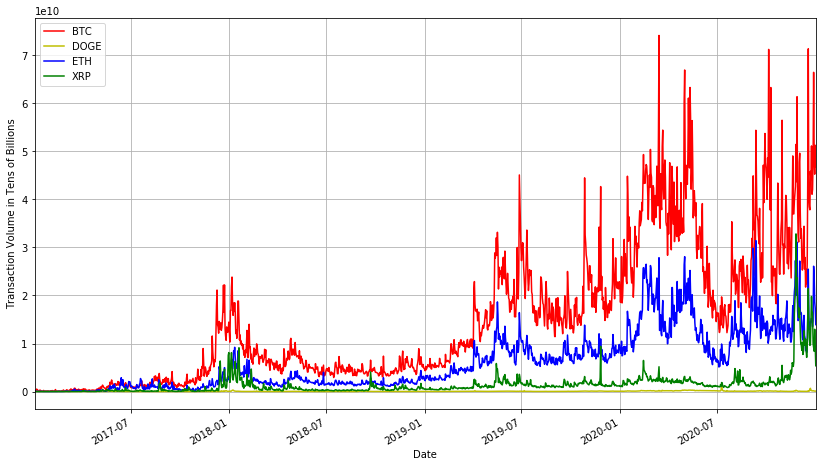

In [9]:
btc['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='BTC', color='r', figsize=(14,8))
doge['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='DOGE', color='y', figsize=(14,8))
eth['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='ETH', color='b', figsize=(14,8))
xrp['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='XRP', color='g', figsize=(14,8))
plt.ylabel('Transaction Volume in Tens of Billions')
plt.legend()
plt.grid()

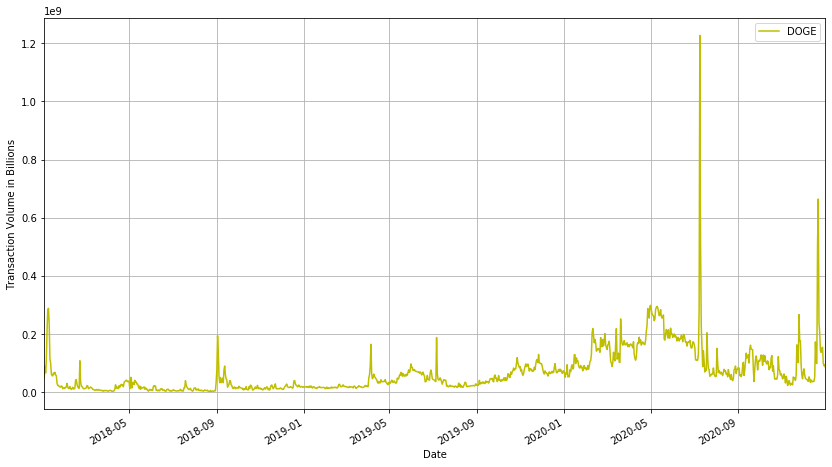

In [10]:
doge['Volume'].loc['2018-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='DOGE', color='y', figsize=(14,8))
plt.ylabel('Transaction Volume in Billions')
plt.legend()
plt.grid()

# Cryptocurrency is known for being extremely volatile so we can plot the percent change of the daily closing price to visualize it and We can view the same data on a histogram.


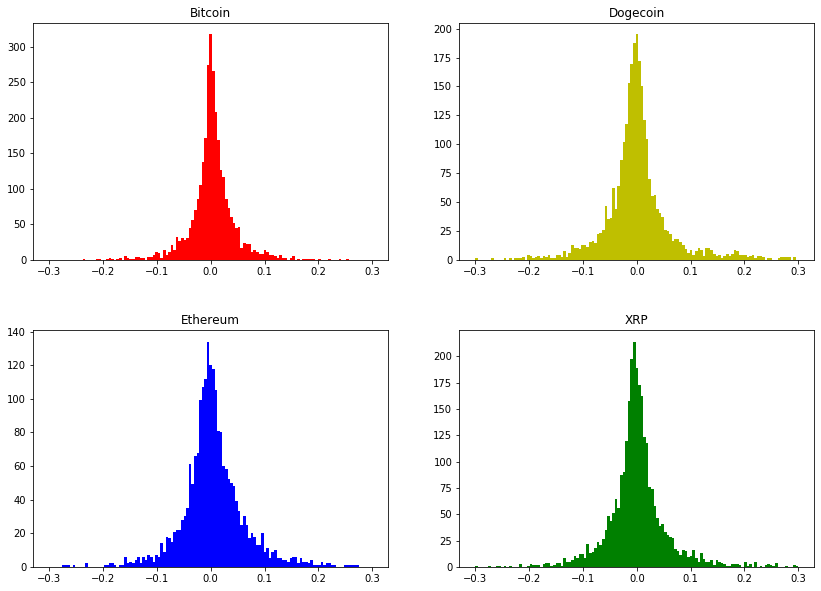

In [13]:
fig, ax = plt.subplots(2,2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

def subplotter_hist(data, title, pos, color):
    ax[pos].hist(data.Close.pct_change(), color=color, bins=125, range=(-0.3, 0.3))
    ax[pos].set_title(title)
    plt.show

subplotter_hist(btc, 'Bitcoin', btcpos, 'r')
subplotter_hist(doge, 'Dogecoin', dogepos, 'y')
subplotter_hist(eth, 'Ethereum', ethpos, 'b')
subplotter_hist(xrp, 'XRP', xrppos, 'g')

#  We can also show the cumulative returns on these cryptos over their lives to get a good idea of their performance over time. This is a good way of visualizing the growth of each crypto relative to eachother.

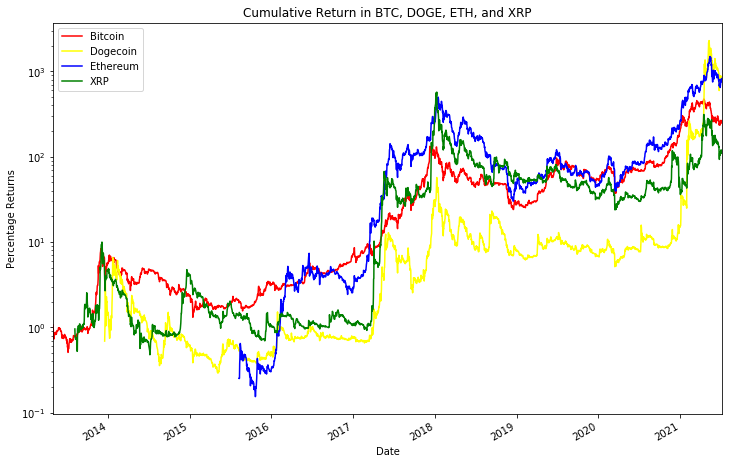

In [21]:
btc_return = btc.Open.pct_change()+1
doge_return = doge.Open.pct_change()+1
eth_return = eth.Open.pct_change()+1
xrp_return = xrp.Open.pct_change()+1
btc_cump = btc_return.cumprod()
doge_cump = doge_return.cumprod()
eth_cump = eth_return.cumprod()
xrp_cump = xrp_return.cumprod()
plt.figure(figsize=(12,8))
btc_cump.plot(c='red')
doge_cump.plot(c='yellow')
eth_cump.plot(c='blue')
xrp_cump.plot(c='green')
plt.title('Cumulative Return in BTC, DOGE, ETH, and XRP')
plt.legend(('Bitcoin','Dogecoin', 'Ethereum', 'XRP'))
plt.yscale('log')
plt.ylabel('Percentage Returns')
plt.show()

We can clearly see that Bitcoin is the most traded coin of the four followed fairly closely by Ethereum, XRP fell off after it's inception but is now catching up again in 2021. Relatively no one is trading dogecoin compared to the other coins.

As you can see crypto is doing better than ever, however it still remains a high risk - high reward investment With more accessability, adoption and use many believe the price will eventually stabilize and continue on it's upward trend
